In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

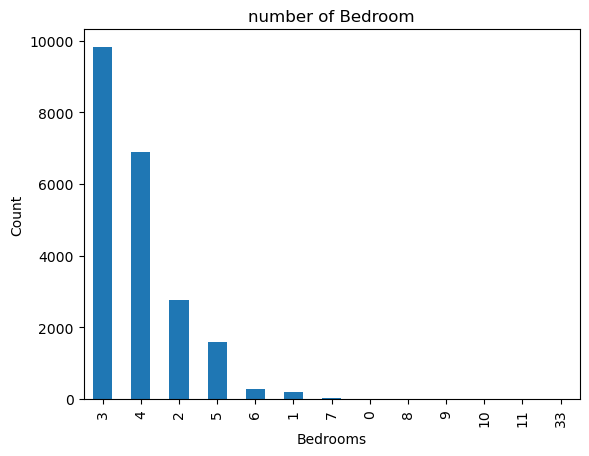

In [12]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<Figure size 1000x600 with 0 Axes>

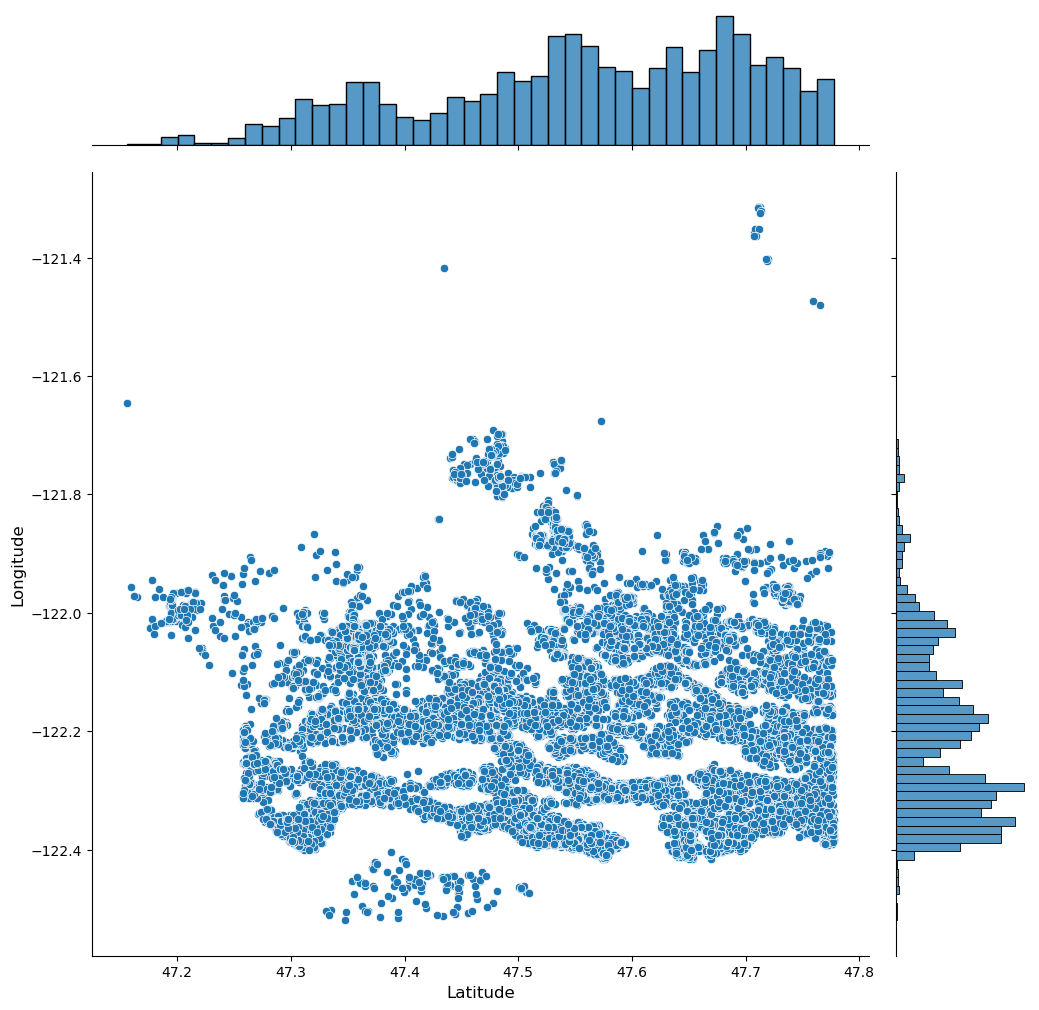

In [15]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Price vs Square Feet')

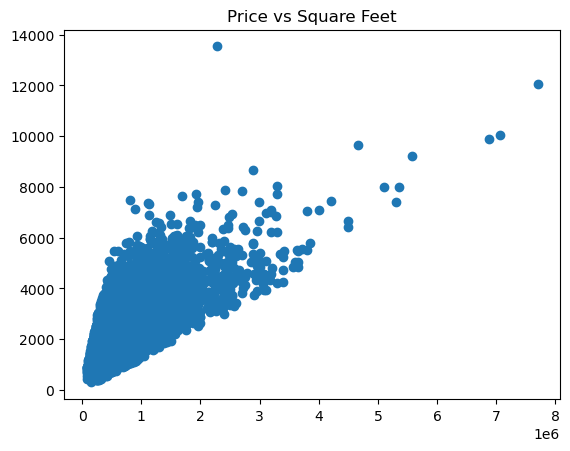

In [16]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

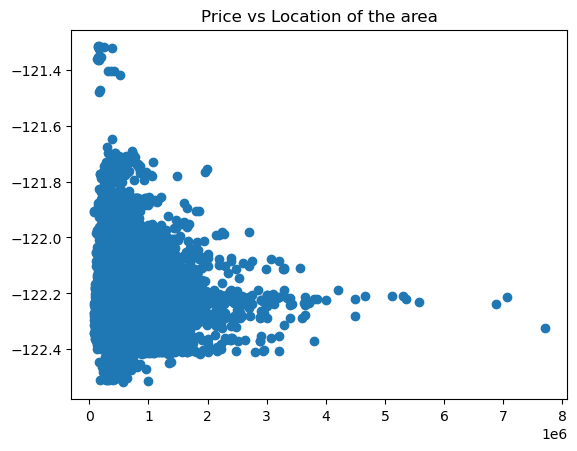

In [17]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

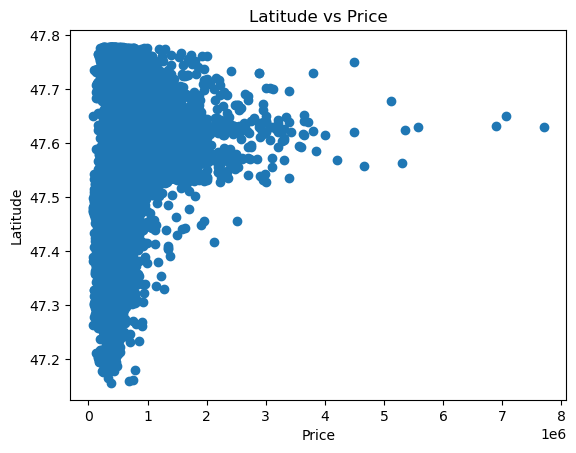

In [18]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

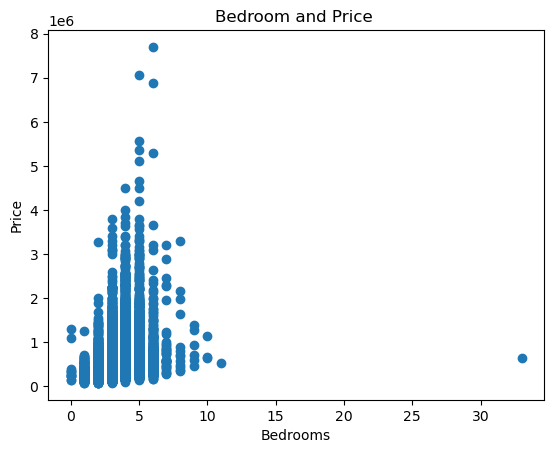

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [19]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

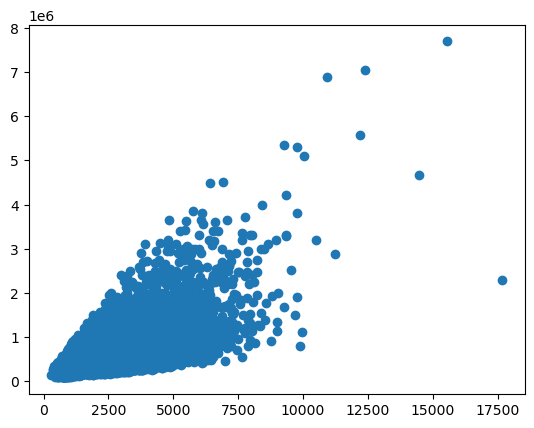

In [20]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

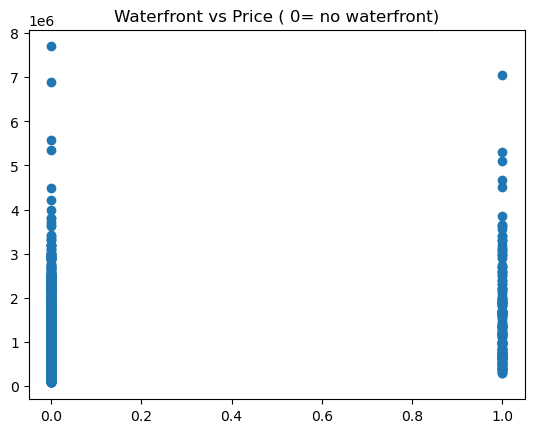

In [21]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

<Axes: >

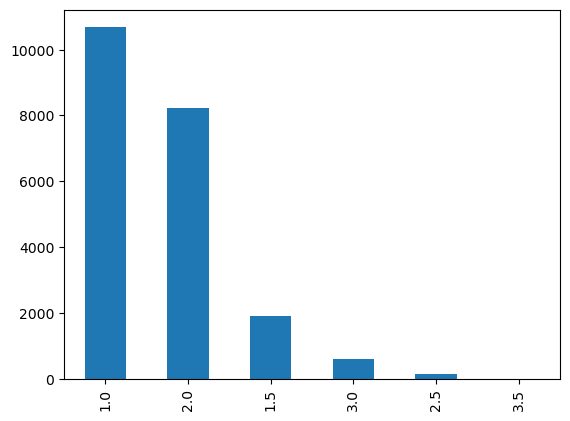

In [24]:
data.floors.value_counts().plot(kind='bar')

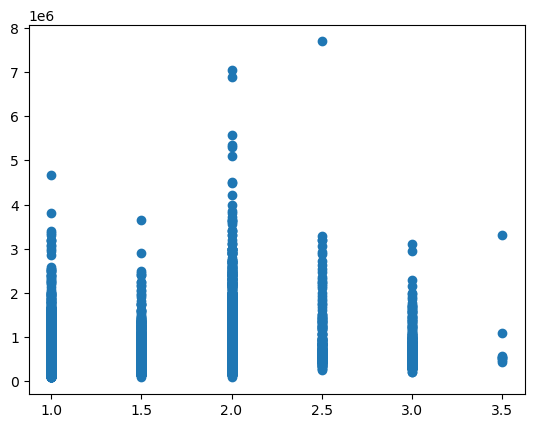

In [25]:
plt.scatter(data.floors,data.price)

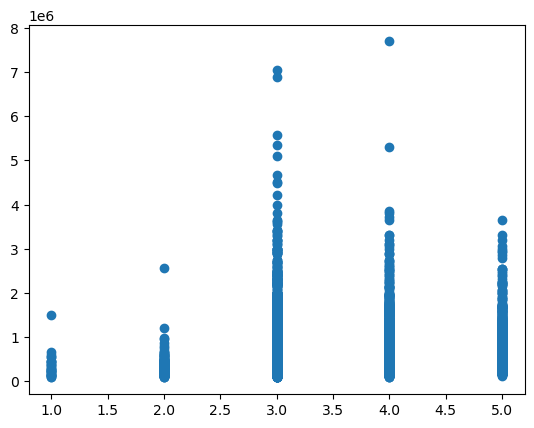

In [26]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

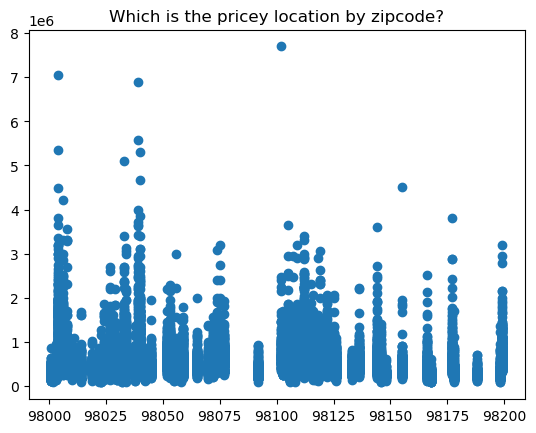

In [27]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

In [35]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['date'] = data['date'].dt.year

In [36]:
x = data.drop(['id', 'price'],axis=1)
x = x.apply(pd.to_numeric)
y = data['price']

In [37]:
print(x)

       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      2014         3       1.00         1180      5650     1.0           0   
1      2014         3       2.25         2570      7242     2.0           0   
2      2015         2       1.00          770     10000     1.0           0   
3      2014         4       3.00         1960      5000     1.0           0   
4      2015         3       2.00         1680      8080     1.0           0   
...     ...       ...        ...          ...       ...     ...         ...   
21608  2014         3       2.50         1530      1131     3.0           0   
21609  2015         4       2.50         2310      5813     2.0           0   
21610  2014         2       0.75         1020      1350     2.0           0   
21611  2015         3       2.50         1600      2388     2.0           0   
21612  2014         2       0.75         1020      1076     2.0           0   

       view  condition  grade  sqft_above  sqft_bas

In [38]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19451, 19)
(2162, 19)
(19451,)
(2162,)


Error Report : 0.6955758781032426


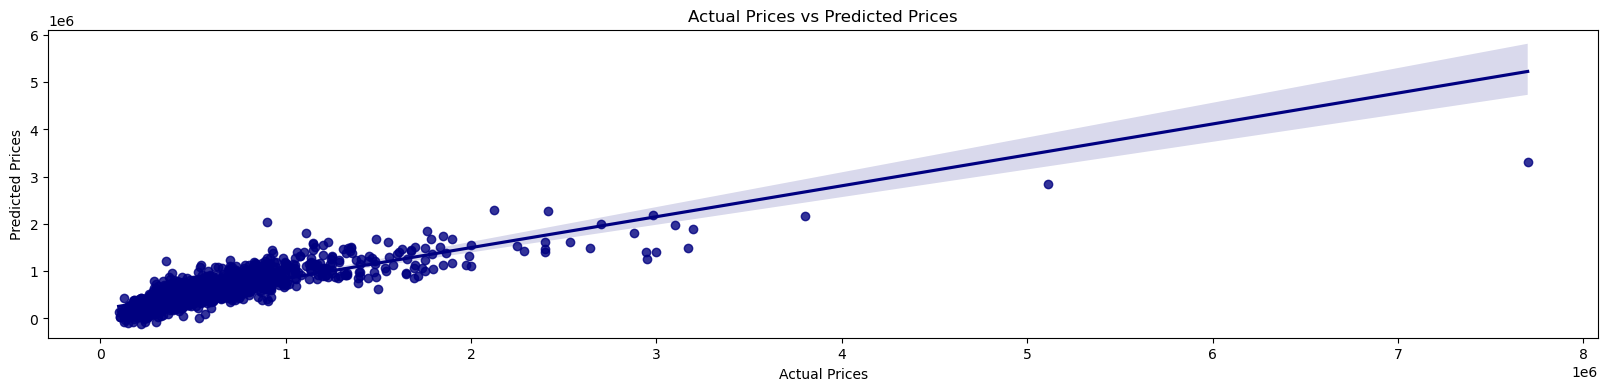

In [48]:
r2_scores = {}

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Linear Regression'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
#plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

C:\Users\ishit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.484e+14, tolerance: 2.556e+11
  model = cd_fast.enet_coordinate_descent(


Error Report : 0.6955765250935515


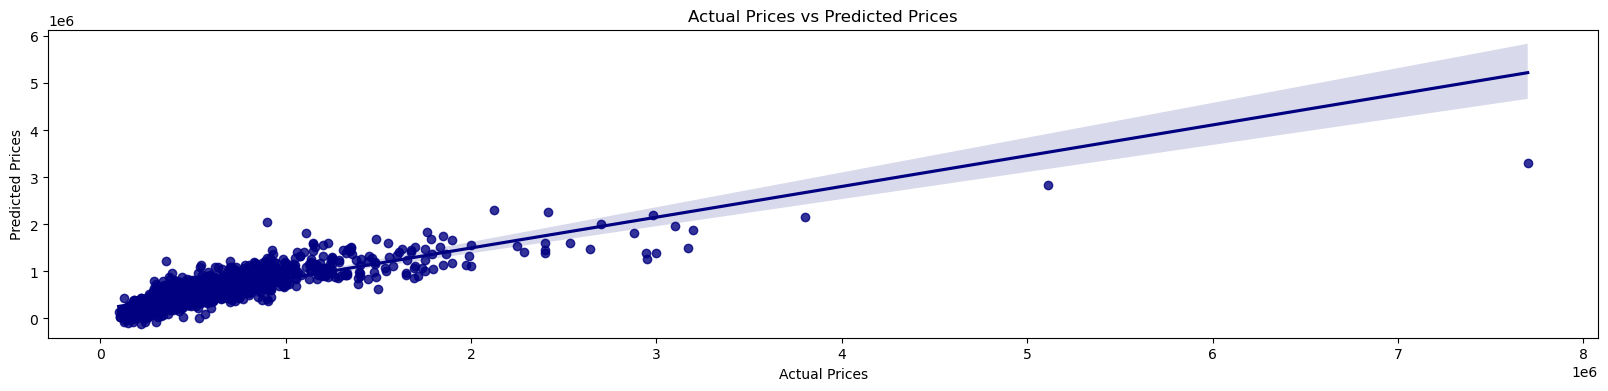

In [49]:
model2 = Lasso()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Lasso Regression'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Error Report : 0.788316832425499


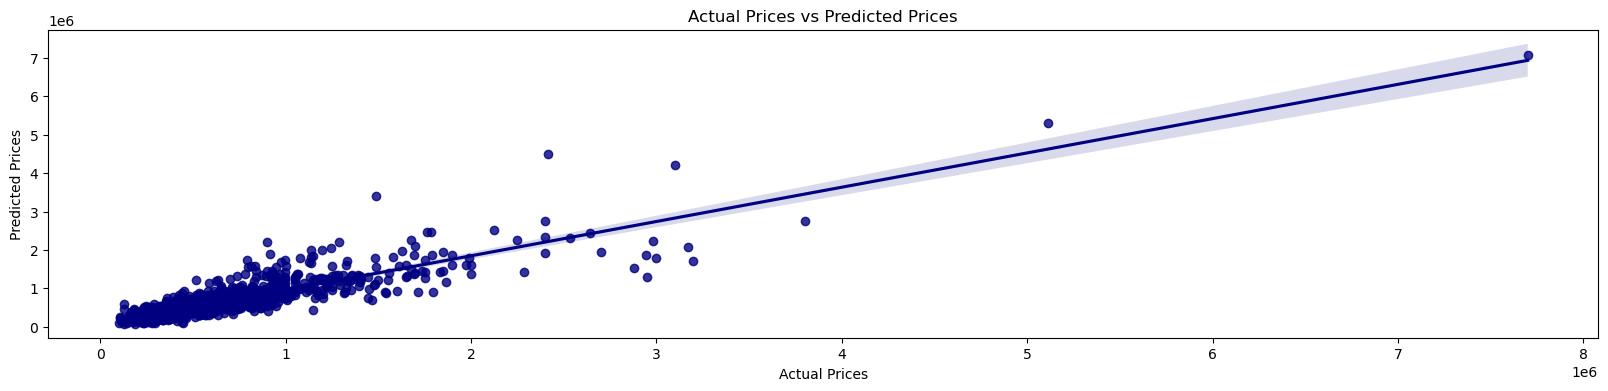

In [50]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Decision Tree'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Error Report : 0.8794273248148003


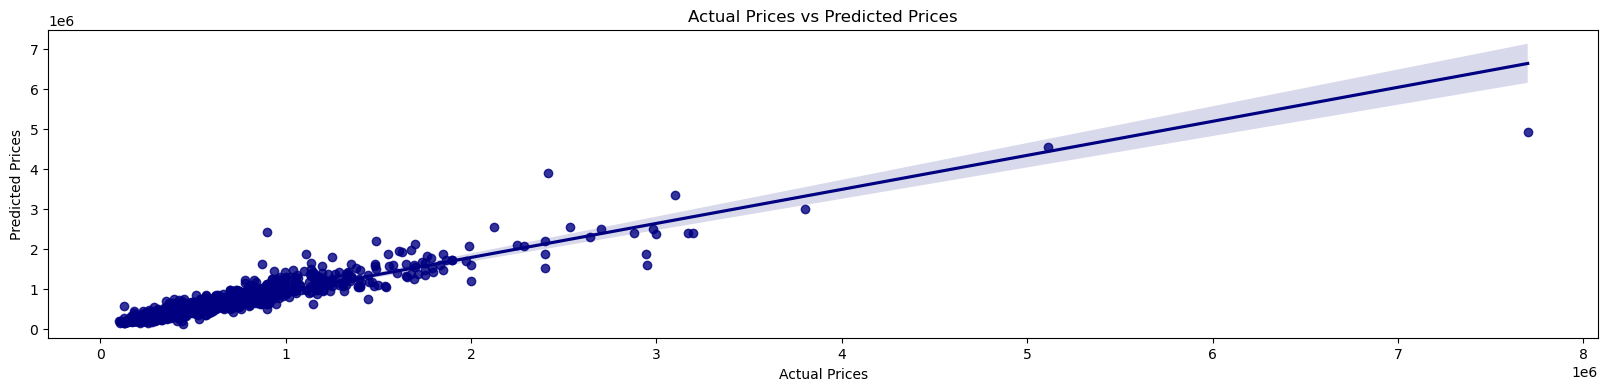

In [51]:
model4 = RandomForestRegressor()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Random Forest'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Error Report : 0.10861946410058387


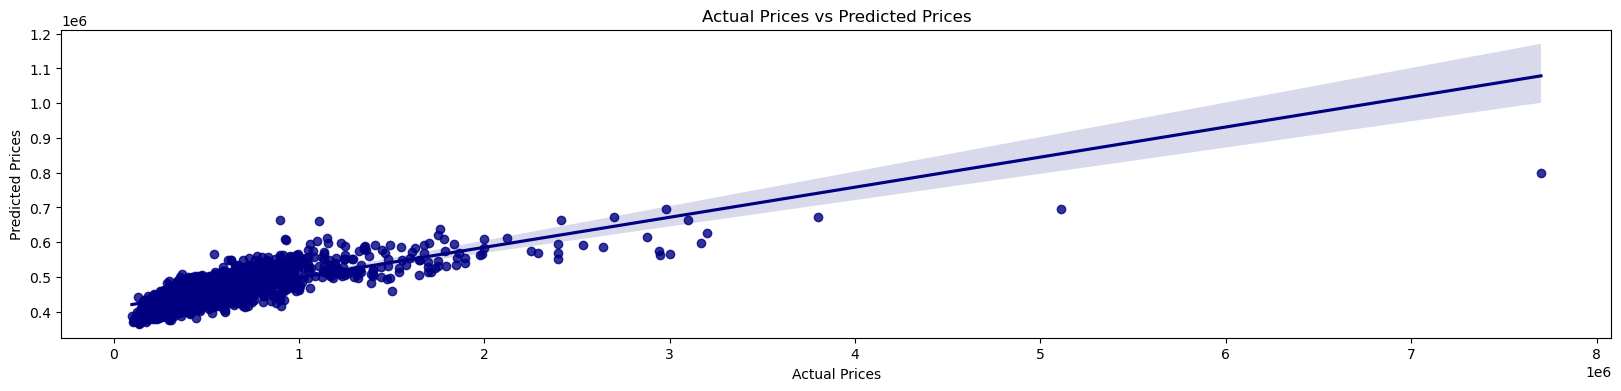

In [52]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model5 = SVR(kernel='linear')  
model5.fit(x_train_scaled, y_train)
y_pred = model5.predict(x_test_scaled)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Support Vector Machine'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Error Report : 0.7670061820480206


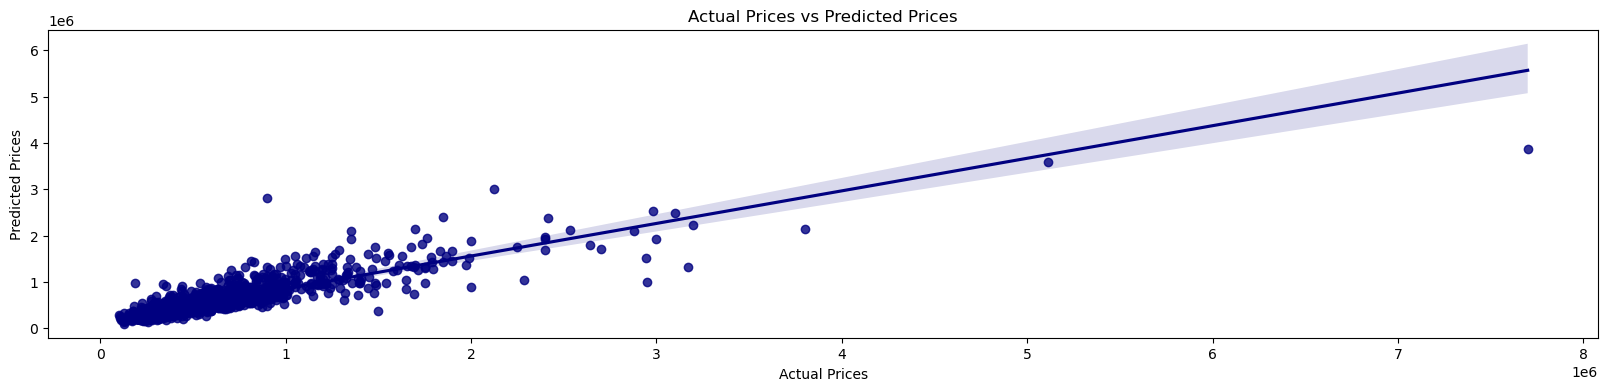

In [53]:
model6 = KNeighborsRegressor(n_neighbors=5)
model6.fit(x_train_scaled, y_train)
y_pred = model6.predict(x_test_scaled)
error = metrics.r2_score(y_test, y_pred)
r2_scores['KNN Neighbours'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [54]:
for name, r2 in r2_scores.items():
    print(f"{name}: R-squared = {r2:.4f}")

Linear Regression: R-squared = 0.6956
Lasso Regression: R-squared = 0.6956
Decision Tree: R-squared = 0.7883
Random Forest: R-squared = 0.8794
Support Vector Machine: R-squared = 0.1086
KNN Neighbours: R-squared = 0.7670
